# Importar librerias



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py 
py.init_notebook_mode(connected=True)                  
import plotly.graph_objs as go                         
import plotly.tools as tls                             
from collections import Counter                        
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV                                         # to split the data
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve, r2_score, accuracy_score, confusion_matrix, classification_report, fbeta_score     # to evaluate our model
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
import tensorflow as tf
from tensorflow import keras
from keras.api._v2.keras import Sequential
from keras.api._v2.keras.layers import Flatten, Dense

import warnings
import missingno as msno
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Adquisición de datos


###Variables:

*   **Group**: Grupo del paciente
*   **Sex**: Sexo del paciente
*   **Age**: Edad del paciente
*   **Patients number per hour**:Numero de pacientes por hora
*   **Arrival mode**: Tipo de transporte para llegar al hospital
*   **Injury**: Si el paciente está lesionado o no
*   **Chief_complain**: La queja del paciente
*   **Mental**: El estado mental del paciente
*   **Pain**: Si el paciente tiene dolor
*   **NRS_pain**: Evaluación del dolor por parte de la enfermera para el paciente
*   **SBP**: Presión sanguínea sistólica.
*   **DBP**: Presión arterial diastólica.
*   **HR**: Ritmo cardíaco
*   **RR**: Frecuencia respiratoria
*   **BT**: Temperatura corporal
*   **Saturation**: Saturación de oxigeno en sangre
*   **KTAS_RN**: Escala coreana de triaje y agudeza en el hospital
*   **Diagnosis in ED**: Diagnóstico en urgencias
*   **Disposition**: Acción para ser tomada
*   **KTAS_expert**: Escala coreana de triaje y agudeza corregido por expertos
*   **Error_group**: --
*   **Length of stay_min**: Duración de la estancia en minutos
*   **KTAS duration_min**: Duración del triaje en minutos
*   **mistriage**: Diferencias en el triaje

###Se ha alcanzado el documento técnico en el proyecto del conjunto de datos. Se vio en este documento que algunos datos numéricos eran en realidad categóricos. Estos valores son los siguientes.

*   Motivo de la visita : Injury [1 = No, 2= Si]
*   Genero : Sex [1 = Mujer, 2 = Hombre]
*   Dolor : Pain [1 = Si, 0 = No]
*   Estado Mental : Mental [1 = Alerta, 2 = Respuesta verbal, 3 = Respuesta al dolor, 4 = falta de respuesta]
*   Tipo de Urgencia : Grupo [1 = Urgencia local de 3 grado, 2 = Urgencia regional de 4 grado]
*   Modo de llegada : Arrival Mode [1 = Caminando, 2 = Ambulancia publica, 3 = Vehiculo privado, 4 = Ambulancia privada, 5,6,7 = Otro]
*   Acción a tomar : Disposition [1 = Sin cambio, 2 = Admisión a la sala, 3 = Admisión a unidad cuidado intensivo, 4 = Descarga, 5 = Transferencia, 6 = Muerte, 7 = Cirugia]
*   KTAS : KTAS... [1,2,3 = Emergencia, 4,5 = No Emergencia]

#2. Exploration Data Analysis (EDA)

## Leyendo el dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TFG/data_TFG.csv',sep=';',encoding='unicode_escape')

## Se accede a las primeras 5 unidades de observación del conjunto de datos.

In [3]:
df.head()

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage
0,2,2,71,3,3,2,right ocular pain,1,1,2,160,100,84,18,36.6,100,2,Corneal abrasion,1,4,2,86,"5,00",1
1,1,1,56,12,3,2,right forearm burn,1,1,2,137,75,60,20,36.5,NaN,4,"Burn of hand, firts degree dorsum",1,5,4,64,"3,95",1
2,2,1,68,8,2,2,"arm pain, Lt",1,1,2,130,80,102,20,36.6,98,4,"Fracture of surgical neck of humerus, closed",2,5,4,862,"1,00",1
3,1,2,71,8,1,1,ascites tapping,1,1,3,139,94,88,20,36.5,NaN,4,Alcoholic liver cirrhosis with ascites,1,5,6,108,"9,83",1
4,1,2,58,4,3,1,"distension, abd",1,1,3,91,67,93,18,36.5,NaN,4,Ascites,1,5,8,109,"6,60",1


## información de las columnas del dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Group                     1267 non-null   int64 
 1   Sex                       1267 non-null   int64 
 2   Age                       1267 non-null   int64 
 3   Patients number per hour  1267 non-null   int64 
 4   Arrival mode              1267 non-null   int64 
 5   Injury                    1267 non-null   int64 
 6   Chief_complain            1267 non-null   object
 7   Mental                    1267 non-null   int64 
 8   Pain                      1267 non-null   int64 
 9   NRS_pain                  1267 non-null   object
 10  SBP                       1267 non-null   object
 11  DBP                       1267 non-null   object
 12  HR                        1267 non-null   object
 13  RR                        1267 non-null   object
 14  BT                      

## El tamaño del conjunto de datos (filas, columnas)

In [5]:
df.shape

(1267, 24)

## Estadísticas descriptivas del conjunto de datos

In [6]:
df.describe([0.10,0.25,0.50,0.75,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,95%,99%,max
Group,1267.000,1.457,0.498,1.000,1.000,1.000,1.000,2.000,2.000,2.000,2.000
Sex,1267.000,1.522,0.500,1.000,1.000,1.000,2.000,2.000,2.000,2.000,2.000
Age,1267.000,54.424,19.725,16.000,25.000,37.000,57.000,71.000,82.000,88.000,96.000
Patients number per hour,1267.000,7.519,3.161,1.000,3.000,5.000,7.000,10.000,13.000,15.000,17.000
Arrival mode,1267.000,2.821,0.808,1.000,2.000,2.000,3.000,3.000,4.000,5.000,7.000
Injury,1267.000,1.193,0.394,1.000,1.000,1.000,1.000,1.000,2.000,2.000,2.000
Mental,1267.000,1.106,0.448,1.000,1.000,1.000,1.000,1.000,2.000,3.340,4.000
Pain,1267.000,0.564,0.496,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000
KTAS_RN,1267.000,3.335,0.885,1.000,2.000,3.000,3.000,4.000,5.000,5.000,5.000
Disposition,1267.000,1.609,1.158,1.000,1.000,1.000,1.000,2.000,4.000,7.000,7.000


## ¿Hay valores nulos?

In [7]:
df.isnull().values.any()

True

#3. PREPROCESAMIENTO DE DATOS

##3.1. Análisis de valores perdidos

In [8]:
def missing_values_table(dataframe):
    variables_with_na = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[variables_with_na].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[variables_with_na].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df)
    return variables_with_na

df['NRS_pain'] = df[["NRS_pain"]].replace("#BOÞ!",np.NaN)

missing_values_table(df)

                 n_miss  ratio
Saturation          688 54.300
NRS_pain            556 43.880
Diagnosis in ED       2  0.160


['NRS_pain', 'Saturation', 'Diagnosis in ED']

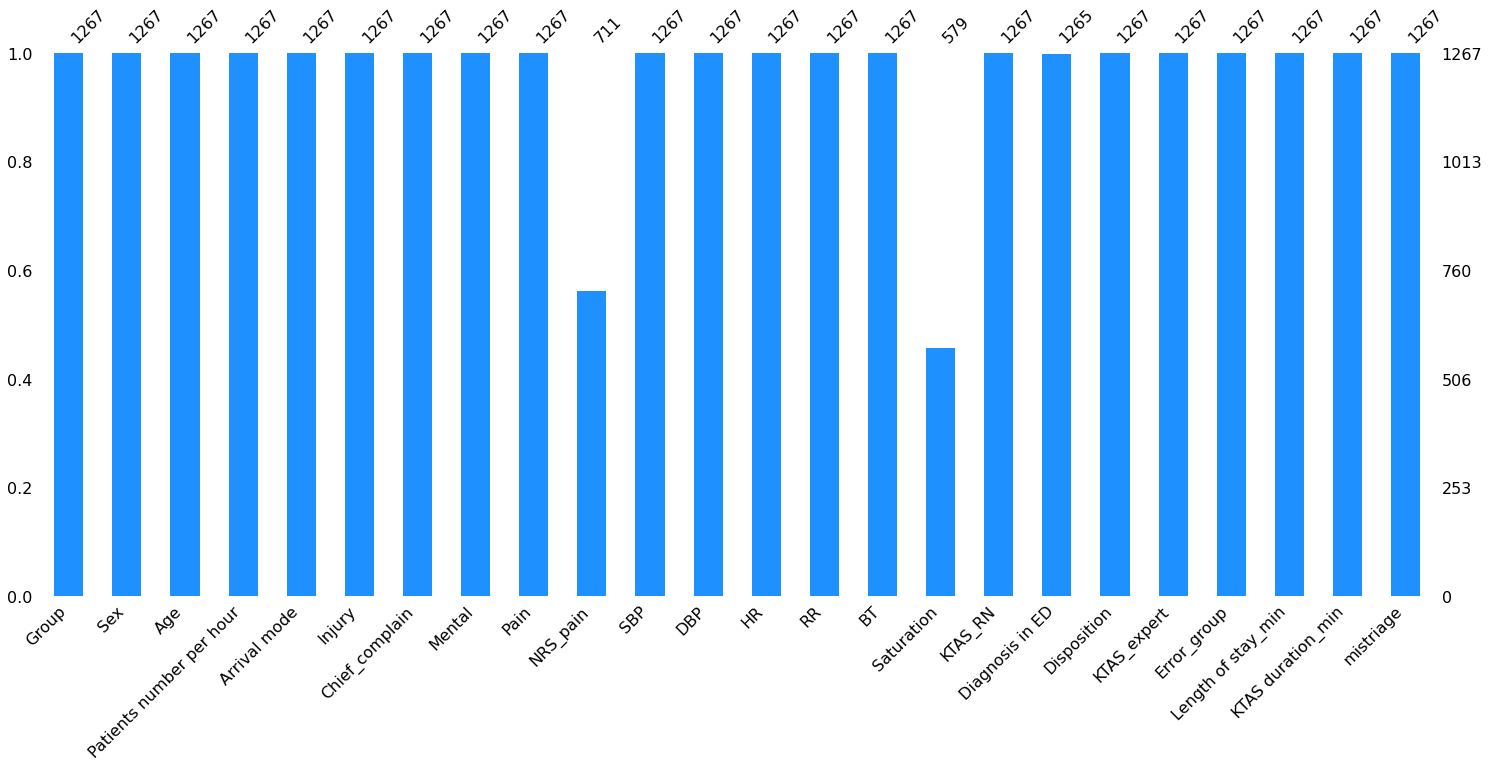

In [9]:
msno.bar(df, color="dodgerblue")

### Rellenar valor faltante

In [10]:
df["NRS_pain"] = df.groupby(["mistriage", "KTAS_expert"])["NRS_pain"].transform(lambda x: x.fillna(x.mode()[0]))
df["Saturation"] = df.groupby(["mistriage", "KTAS_expert"])["Saturation"].transform(lambda x: x.fillna(x.mode()[0]))
df["Diagnosis in ED"] = df.groupby(["mistriage", "KTAS_expert"])["Diagnosis in ED"].transform(lambda x: x.fillna(x.mode()[0]))

In [11]:
df.isnull().values.any()

False

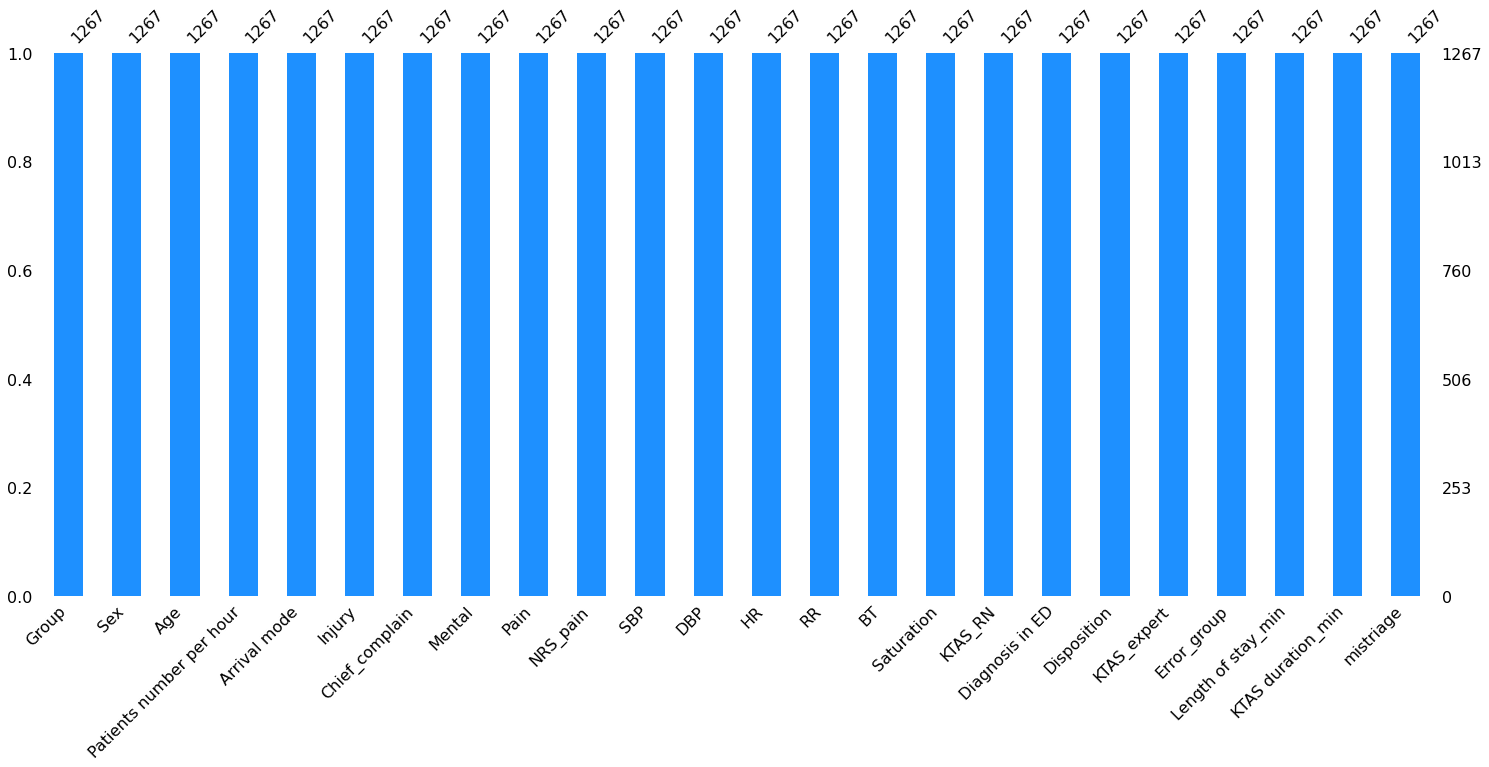

In [12]:
msno.bar(df, color="dodgerblue")

##3.2 Transformación y creación de variables y caracteristicas

###Creación de variables categoricas y normalizaciónes

In [13]:
injury_cat = ['No','Si']
sex_cat = ['Mujer','Hombre']
pain_cat = ['No','Si']
mental_cat = ['Alerta','Respuesta verbal','Respuesta al dolor','falta de respuesta']
group_cat = ['Urgencia local de 3 grado', 'Urgencia regional de 4 grado']
arrival_mode_cat = ['Caminando','Ambulancia publica', 'Vehiculo privado','Ambulancia privada', 'Otro','Otro','Otro']
disposition_cat = ['Sin cambio', 'Admisión a la sala', 'Admisión a unidad cuidado intensivo', 'Descarga', 'Transferencia', 'Muerte', 'Cirugia']
KTAS_cat = ['Emergencia','Emergencia','Emergencia', 'No Emergencia', 'No Emergencia']
mistriage_cat = ['Triaje Normal','Sobre triaje','Bajo triaje']

df['KTAS duration_min'] = df['KTAS duration_min'].apply(lambda x: int(float(x.replace(',', '.'))))
df['NRS_pain'] = df['NRS_pain'].apply(lambda x:int(x))

###Los datos categóricos se ingresaron como datos numéricos. Por lo tanto, van a categorizar con las variables que acabamos de crear

In [14]:
df.loc[df["Sex"] == 1, "Sex"] = sex_cat[0]
df.loc[df["Sex"] == 2, "Sex"] = sex_cat[1]

df.loc[df["Injury"] == 1, "Injury"] = injury_cat[0]
df.loc[df["Injury"] == 2, "Injury"] = injury_cat[1]

df.loc[df["Pain"] == 0, "Pain"] = pain_cat[0]
df.loc[df["Pain"] == 1, "Pain"] = pain_cat[1]

df.loc[df["Mental"] == 1, "Mental"] = mental_cat[0]
df.loc[df["Mental"] == 2, "Mental"] = mental_cat[1]
df.loc[df["Mental"] == 3, "Mental"] = mental_cat[2]
df.loc[df["Mental"] == 4, "Mental"] = mental_cat[3]

df.loc[df["Group"] == 1, "Group"] = group_cat[0]
df.loc[df["Group"] == 2, "Group"] = group_cat[1]

df.loc[df["Arrival mode"] == 1, "Arrival mode"] = arrival_mode_cat[0]
df.loc[df["Arrival mode"] == 2, "Arrival mode"] = arrival_mode_cat[1]
df.loc[df["Arrival mode"] == 3, "Arrival mode"] = arrival_mode_cat[2]
df.loc[df["Arrival mode"] == 4, "Arrival mode"] = arrival_mode_cat[3]
df.loc[df["Arrival mode"] == 5, "Arrival mode"] = arrival_mode_cat[4]
df.loc[df["Arrival mode"] == 6, "Arrival mode"] = arrival_mode_cat[5]
df.loc[df["Arrival mode"] == 7, "Arrival mode"] = arrival_mode_cat[6]

df.loc[df["Disposition"] == 1, "Disposition"] = disposition_cat[0]
df.loc[df["Disposition"] == 2, "Disposition"] = disposition_cat[1]
df.loc[df["Disposition"] == 3, "Disposition"] = disposition_cat[2]
df.loc[df["Disposition"] == 4, "Disposition"] = disposition_cat[3]
df.loc[df["Disposition"] == 5, "Disposition"] = disposition_cat[4]
df.loc[df["Disposition"] == 6, "Disposition"] = disposition_cat[5]
df.loc[df["Disposition"] == 7, "Disposition"] = disposition_cat[6]

df.loc[df["KTAS_RN"] == 1, "KTAS_RN"] = KTAS_cat[0]
df.loc[df["KTAS_RN"] == 2, "KTAS_RN"] = KTAS_cat[1]
df.loc[df["KTAS_RN"] == 3, "KTAS_RN"] = KTAS_cat[2]
df.loc[df["KTAS_RN"] == 4, "KTAS_RN"] = KTAS_cat[3]
df.loc[df["KTAS_RN"] == 5, "KTAS_RN"] = KTAS_cat[4]

df.loc[df["KTAS_expert"] == 1, "KTAS_expert"] = KTAS_cat[0]
df.loc[df["KTAS_expert"] == 2, "KTAS_expert"] = KTAS_cat[1]
df.loc[df["KTAS_expert"] == 3, "KTAS_expert"] = KTAS_cat[2]
df.loc[df["KTAS_expert"] == 4, "KTAS_expert"] = KTAS_cat[3]
df.loc[df["KTAS_expert"] == 5, "KTAS_expert"] = KTAS_cat[4]

df.loc[df["mistriage"] == 0, "mistriage"] = mistriage_cat[0]
df.loc[df["mistriage"] == 1, "mistriage"] = mistriage_cat[1]
df.loc[df["mistriage"] == 2, "mistriage"] = mistriage_cat[2]

###Se encontraron datos sin sentido en variables que contenían datos numéricos. Estos valores se reemplazaran por la moda de la variable para no afectar la distribución de los datos

In [15]:
df[["SBP","DBP","HR","RR","BT","Saturation"]] = df[["SBP","DBP","HR","RR","BT","Saturation"]].replace("??",0).astype(str).astype(float)
df['SBP'] = df['SBP'].replace(0,df['SBP'].mode()[0])
df['DBP'] = df['DBP'].replace(0,df['DBP'].mode()[0])

###Asignando las nuevas etiquetas categorizadas a partir de los datos numericos de cada variable

In [16]:
interval = (0, 25, 45, 60, 100)
cats = ['Jovem', 'Adulto', 'Media edad', 'Viejo']
df["New_Age"] = pd.cut(df.Age, interval, labels=cats)

df.loc[df['SBP'] < 80, 'New_SBP'] = 'Bajo'
df.loc[(df["SBP"] >= 80) & (df["SBP"] <= 120), 'New_SBP'] = 'Normal'
df.loc[df['SBP'] > 120, 'New_SBP'] = 'Alto'

df.loc[df['DBP'] < 60, 'New_DBP'] = 'Bajo'
df.loc[(df["DBP"] >= 60) & (df["DBP"] <= 80), 'New_DBP'] = 'Normal'
df.loc[df['DBP'] > 80, 'New_DBP'] = 'Alto'

df.loc[df['HR'] < 45, 'New_HR'] = 'Bajo'
df.loc[(df["HR"] >= 45) & (df["HR"] <= 100), 'New_HR'] = 'Normal'
df.loc[df['HR'] > 100, 'New_HR'] = 'Alto'

df.loc[df['RR'] < 12, 'New_RR'] = 'Bajo'
df.loc[(df["RR"] >= 12) & (df["RR"] <= 25), 'New_RR'] = 'Normal'
df.loc[df['RR'] > 25, 'New_RR'] = 'Alto'

df.loc[df['BT'] < 36.4, 'New_BT'] = 'Bajo'
df.loc[(df["BT"] >= 36.4) & (df["BT"] <= 37.6), 'New_BT'] = 'Normal'
df.loc[df['BT'] > 37.6, 'New_BT'] = 'Alto'

df.loc[df['NRS_pain'] < 3, 'New_NRS_pain'] = 'Dolor bajo'
df.loc[(df["NRS_pain"] >= 3) & (df["NRS_pain"] <= 7), 'New_NRS_pain'] = 'Dolor'
df.loc[df['NRS_pain'] > 7, 'New_NRS_pain'] = 'Dolor alto'

df.loc[df['KTAS duration_min'] < 10, 'New_KTAS_duration_min'] = 'Inmediato'
df.loc[(df["KTAS duration_min"] >= 10) & (df["KTAS duration_min"] <= 60), 'New_KTAS_duration_min'] = 'Muy urgente'
df.loc[(df["KTAS duration_min"] >= 61) & (df["KTAS duration_min"] <= 120), 'New_KTAS_duration_min'] = 'Urgente'
df.loc[(df["KTAS duration_min"] >= 121) & (df["KTAS duration_min"] <= 240), 'New_KTAS_duration_min'] = 'Estándar'
df.loc[df['KTAS duration_min'] > 240, 'New_KTAS_duration_min'] = 'No Urgente'

df.loc[df['Length of stay_min'] < 10, 'New_Length_of_stay_min'] = 'Inmediato'
df.loc[(df["Length of stay_min"] >= 10) & (df["Length of stay_min"] <= 60), 'New_Length_of_stay_min'] = 'Muy urgente'
df.loc[(df["Length of stay_min"] >= 61) & (df["Length of stay_min"] <= 120), 'New_Length_of_stay_min'] = 'Urgente'
df.loc[(df["Length of stay_min"] >= 121) & (df["Length of stay_min"] <= 240), 'New_Length_of_stay_min'] = 'Estándar'
df.loc[df['Length of stay_min'] > 240, 'New_Length_of_stay_min'] = 'No Urgente'

df.head()

,Group,Sex,Age,Patients number per hour,Arrival mode,Injury,Chief_complain,Mental,Pain,NRS_pain,SBP,DBP,HR,RR,BT,Saturation,KTAS_RN,Diagnosis in ED,Disposition,KTAS_expert,Error_group,Length of stay_min,KTAS duration_min,mistriage,New_Age,New_SBP,New_DBP,New_HR,New_RR,New_BT,New_NRS_pain,New_KTAS_duration_min,New_Length_of_stay_min
0,Urgencia regional de 4 grado,Hombre,71,3,Vehiculo privado,Si,right ocular pain,Alerta,Si,2,160.000,100.000,84.000,18.000,36.600,100.000,Emergencia,Corneal abrasion,Sin cambio,No Emergencia,2,86,5,Sobre triaje,Viejo,Alto,Alto,Normal,Normal,Normal,Dolor bajo,Inmediato,Urgente
1,Urgencia local de 3 grado,Mujer,56,12,Vehiculo privado,Si,right forearm burn,Alerta,Si,2,137.000,75.000,60.000,20.000,36.500,98.000,No Emergencia,"Burn of hand, firts degree dorsum",Sin cambio,No Emergencia,4,64,3,Sobre triaje,Media edad,Alto,Normal,Normal,Normal,Normal,Dolor bajo,Inmediato,Urgente
2,Urgencia regional de 4 grado,Mujer,68,8,Ambulancia publica,Si,"arm pain, Lt",Alerta,Si,2,130.000,80.000,102.000,20.000,36.600,98.000,No Emergencia,"Fracture of surgical neck of humerus, closed",Admisión a la sala,No Emergencia,4,862,1,Sobre triaje,Viejo,Alto,Normal,Alto,Normal,Normal,Dolor bajo,Inmediato,No Urgente
3,Urgencia local de 3 grado,Hombre,71,8,Caminando,No,ascites tapping,Alerta,Si,3,139.000,94.000,88.000,20.000,36.500,98.000,No Emergencia,Alcoholic liver cirrhosis with ascites,Sin cambio,No Emergencia,6,108,9,Sobre triaje,Viejo,Alto,Alto,Normal,Normal,Normal,Dolor,Inmediato,Urgente
4,Urgencia local de 3 grado,Hombre,58,4,Vehiculo privado,No,"distension, abd",Alerta,Si,3,91.000,67.000,93.000,18.000,36.500,98.000,No Emergencia,Ascites,Sin cambio,No Emergencia,8,109,6,Sobre triaje,Media edad,Normal,Normal,Normal,Normal,Normal,Dolor,Inmediato,Urgente


##3.3. Análisis de valores atípicos

### Declaración de funciones 

In [17]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.05)
    quartile3 = dataframe[variable].quantile(0.95)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


def has_outliers(dataframe, num_col_names, plot=False):
    variable_names = []
    for col in num_col_names:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, ":", number_of_outliers)
            variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    return variable_names

In [18]:
has_outliers(df, ["Length of stay_min","Saturation","SBP","DBP","HR","RR","BT"])

Length of stay_min : 19
Saturation : 32
RR : 22
BT : 20


['Length of stay_min', 'Saturation', 'RR', 'BT']

In [19]:
outlier_column = ["Length of stay_min","Saturation","RR","BT"]
for i in outlier_column:
    replace_with_thresholds(df,i)

In [20]:
has_outliers(df, ["SBP","DBP","HR","RR","BT"])

[]

#4. VISUALIZACIÓN DE DATOS

### Se accedió a histogramas y gráficos de densidad de todas las variables.

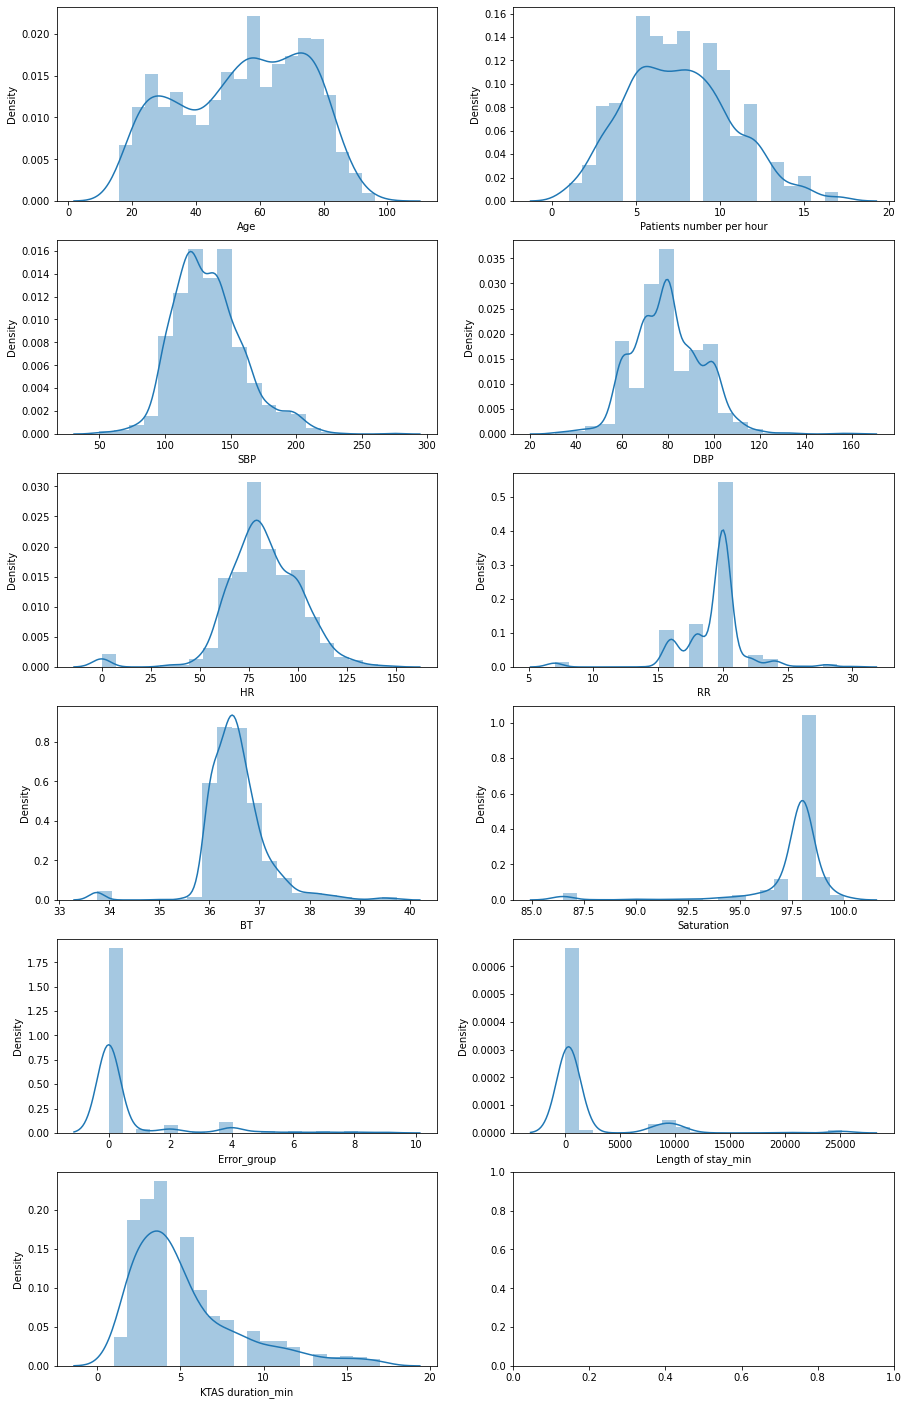

In [21]:
fig, ax = plt.subplots(6,2, figsize=(15,25))
sns.distplot(df['Age'], bins = 20, ax=ax[0,0]) 
sns.distplot(df['Patients number per hour'], bins = 20, ax=ax[0,1]) 
sns.distplot(df['SBP'], bins = 20, ax=ax[1,0]) 
sns.distplot(df['DBP'], bins = 20, ax=ax[1,1]) 
sns.distplot(df['HR'], bins = 20, ax=ax[2,0])
sns.distplot(df['RR'], bins = 20, ax=ax[2,1])
sns.distplot(df['BT'], bins = 20, ax=ax[3,0]) 
sns.distplot(df['Saturation'], bins = 20, ax=ax[3,1]) 
sns.distplot(df['Error_group'], bins = 20, ax=ax[4,0])
sns.distplot(df['Length of stay_min'], bins = 20, ax=ax[4,1]) 
sns.distplot(df['KTAS duration_min'], bins = 20, ax=ax[5,0])

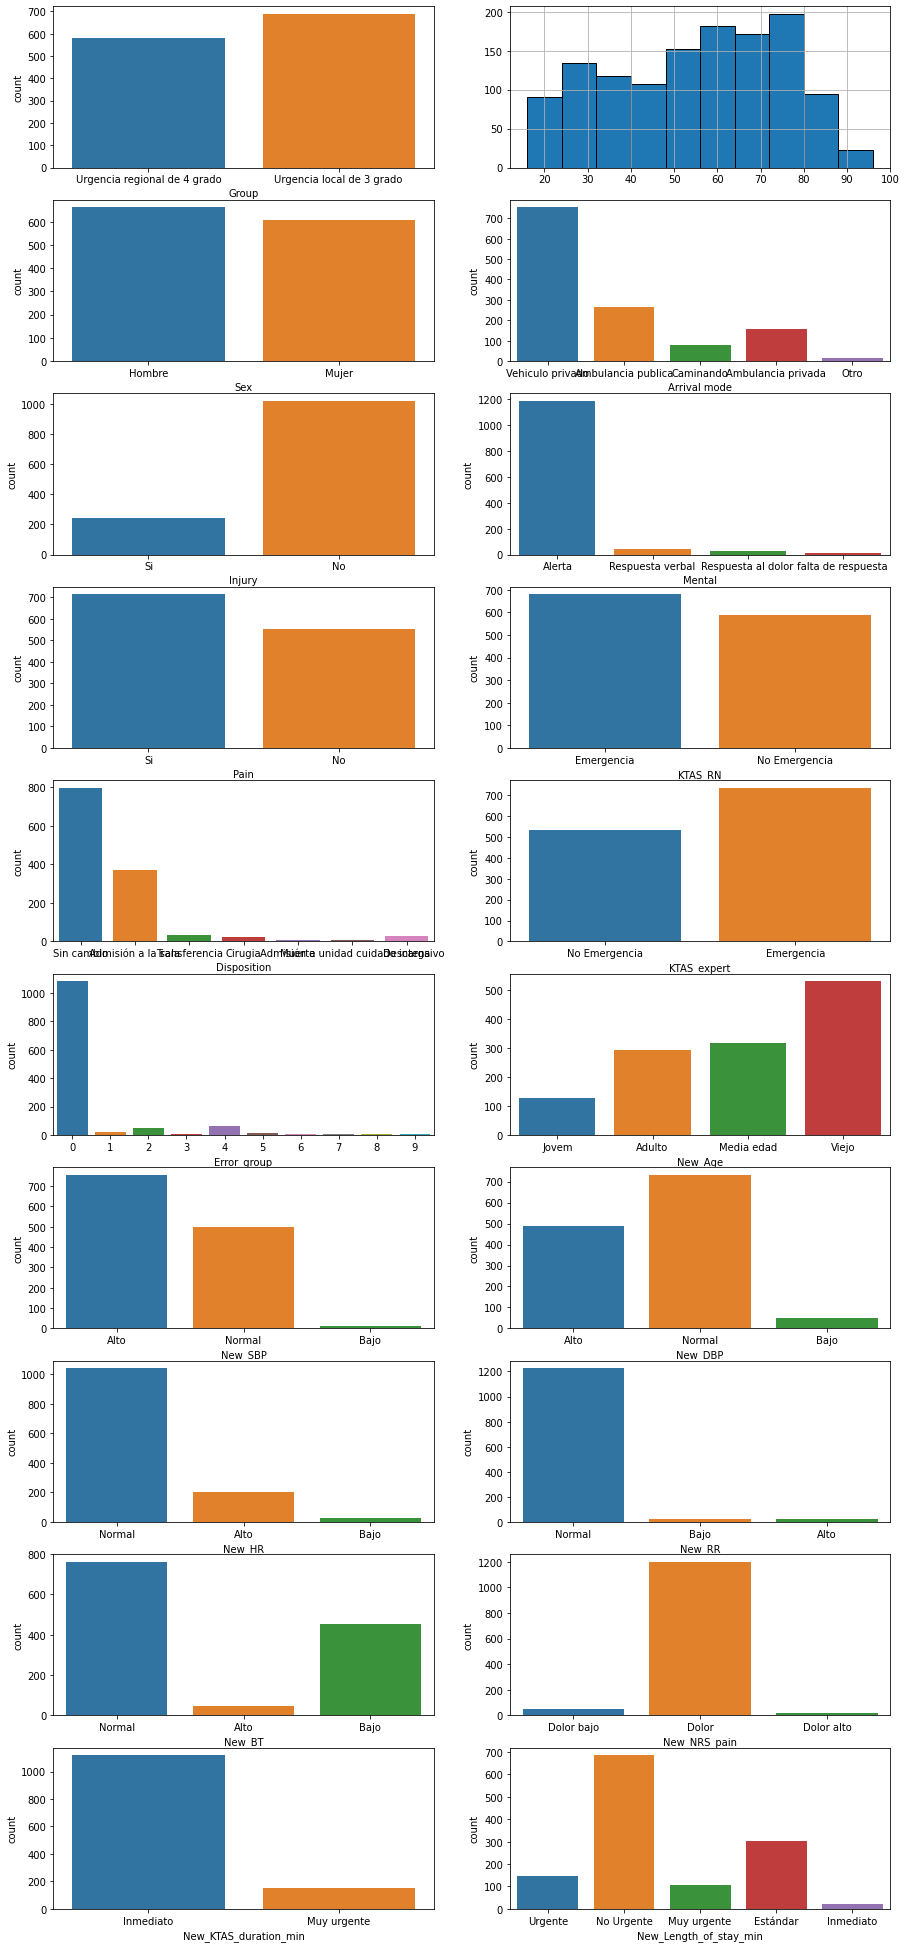

In [22]:
fig, ax = plt.subplots(10,2, figsize=(15,35))
sns.countplot('Group',data=df, ax=ax[0,0]);
df["Age"].hist(edgecolor = "black", ax=ax[0,1]);
sns.countplot('Sex',data=df, ax=ax[1,0]);
sns.countplot('Arrival mode',data=df, ax=ax[1,1]);
sns.countplot('Injury',data=df, ax=ax[2,0]);
sns.countplot('Mental',data=df, ax=ax[2,1]);
sns.countplot('Pain',data=df, ax=ax[3,0]);
sns.countplot('KTAS_RN',data=df, ax=ax[3,1]);
sns.countplot('Disposition',data=df, ax=ax[4,0]);
sns.countplot('KTAS_expert',data=df, ax=ax[4,1]);
sns.countplot('Error_group',data=df, ax=ax[5,0]);
sns.countplot('New_Age',data=df, ax=ax[5,1]);
sns.countplot('New_SBP',data=df, ax=ax[6,0]);
sns.countplot('New_DBP',data=df, ax=ax[6,1]);
sns.countplot('New_HR',data=df, ax=ax[7,0]);
sns.countplot('New_RR',data=df, ax=ax[7,1]);
sns.countplot('New_BT',data=df, ax=ax[8,0]);
sns.countplot('New_NRS_pain',data=df, ax=ax[8,1]);
sns.countplot('New_KTAS_duration_min',data=df, ax=ax[9,0]);
sns.countplot('New_Length_of_stay_min',data=df, ax=ax[9,1]);

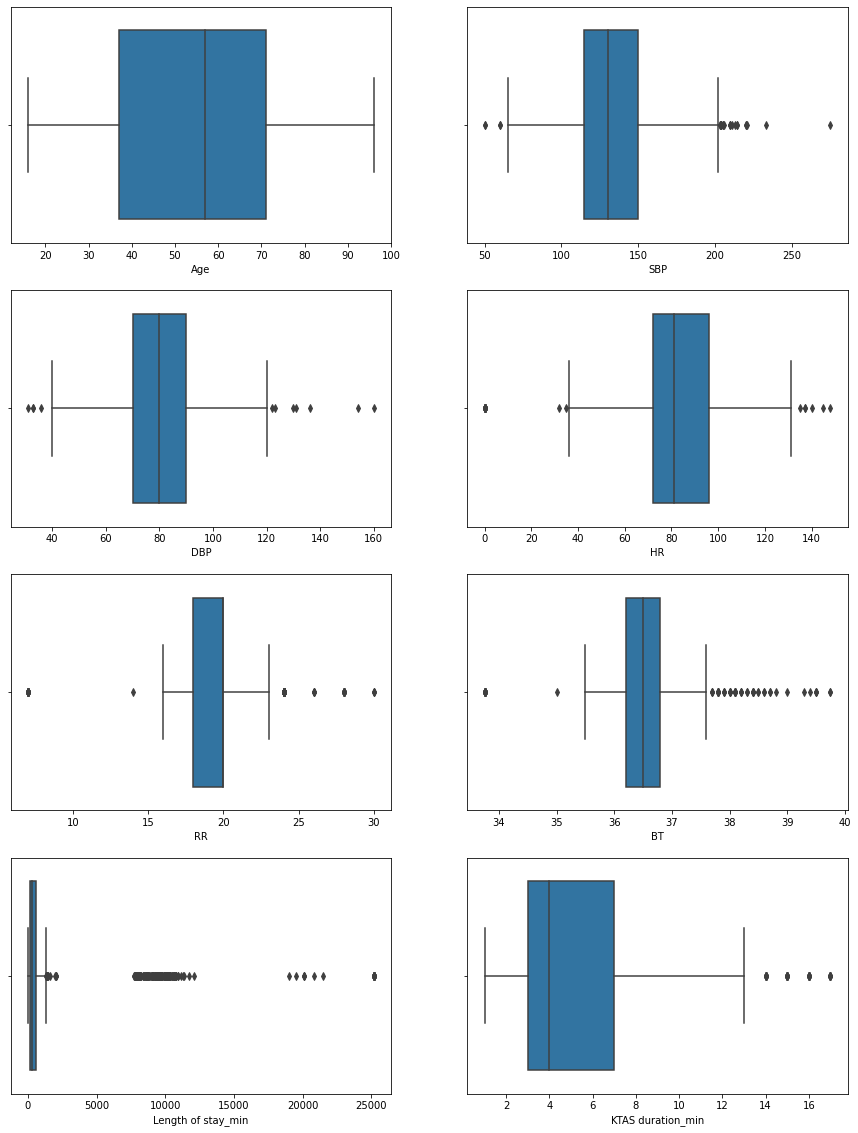

In [23]:
fig, ax = plt.subplots(4,2, figsize=(15,20))
sns.boxplot(x=df["Age"], ax=ax[0,0]);
sns.boxplot(x=df["SBP"], ax=ax[0,1]);
sns.boxplot(x=df["DBP"], ax=ax[1,0]);
sns.boxplot(x=df["HR"], ax=ax[1,1]);
sns.boxplot(x=df["RR"], ax=ax[2,0]);
sns.boxplot(x=df["BT"], ax=ax[2,1]);
sns.boxplot(x=df["Length of stay_min"], ax=ax[3,0]);
sns.boxplot(x=df["KTAS duration_min"], ax=ax[3,1]);

#5. Segmentación de datos con modelos de aprendizaje automático

##5.1. Una codificación en caliente y un escalador robusto

In [24]:
def one_hot_encoder(dataframe, categorical_columns, nan_as_category=False):
    original_columns = list(dataframe.columns)
    dataframe = pd.get_dummies(dataframe, columns=categorical_columns,
                               dummy_na=nan_as_category, drop_first=True)
    new_columns = [col for col in dataframe.columns if col not in original_columns]
    return dataframe, new_columns

def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.05)
    quartile3 = variable.quantile(0.95)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)

In [25]:
new_df = df[["Group", "Sex", "Patients number per hour", "Arrival mode", "Injury", "Mental", "Pain", "Saturation", "KTAS_RN",
"Disposition", "KTAS_expert", "Length of stay_min", "mistriage", "New_Age", "New_SBP", "New_DBP", "New_HR",
"New_RR", "New_BT", "New_NRS_pain", "New_KTAS_duration_min", "New_Length_of_stay_min"]]
new_df.head()

,Group,Sex,Patients number per hour,Arrival mode,Injury,Mental,Pain,Saturation,KTAS_RN,Disposition,KTAS_expert,Length of stay_min,mistriage,New_Age,New_SBP,New_DBP,New_HR,New_RR,New_BT,New_NRS_pain,New_KTAS_duration_min,New_Length_of_stay_min
0,Urgencia regional de 4 grado,Hombre,3,Vehiculo privado,Si,Alerta,Si,100.000,Emergencia,Sin cambio,No Emergencia,86.000,Sobre triaje,Viejo,Alto,Alto,Normal,Normal,Normal,Dolor bajo,Inmediato,Urgente
1,Urgencia local de 3 grado,Mujer,12,Vehiculo privado,Si,Alerta,Si,98.000,No Emergencia,Sin cambio,No Emergencia,64.000,Sobre triaje,Media edad,Alto,Normal,Normal,Normal,Normal,Dolor bajo,Inmediato,Urgente
2,Urgencia regional de 4 grado,Mujer,8,Ambulancia publica,Si,Alerta,Si,98.000,No Emergencia,Admisión a la sala,No Emergencia,862.000,Sobre triaje,Viejo,Alto,Normal,Alto,Normal,Normal,Dolor bajo,Inmediato,No Urgente
3,Urgencia local de 3 grado,Hombre,8,Caminando,No,Alerta,Si,98.000,No Emergencia,Sin cambio,No Emergencia,108.000,Sobre triaje,Viejo,Alto,Alto,Normal,Normal,Normal,Dolor,Inmediato,Urgente
4,Urgencia local de 3 grado,Hombre,4,Vehiculo privado,No,Alerta,Si,98.000,No Emergencia,Sin cambio,No Emergencia,109.000,Sobre triaje,Media edad,Normal,Normal,Normal,Normal,Normal,Dolor,Inmediato,Urgente


In [26]:
like_num = [col for col in new_df.columns if new_df[col].dtypes != 'O' and len(new_df[col].value_counts()) > 10]
cols_need_scale = [col for col in new_df.columns if col not in like_num
                   and col not in 'mistriage']

In [27]:
for col in like_num:
    new_df[col] = robust_scaler(new_df[col])

new_df, one_hot_encodeds = one_hot_encoder(new_df, cols_need_scale)

In [28]:
X = new_df.drop('mistriage', axis=1)
y = np.ravel(new_df[['mistriage']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 357)

In [29]:
X_train.head()

,Patients number per hour,Saturation,Length of stay_min,Group_Urgencia regional de 4 grado,Sex_Mujer,Arrival mode_Ambulancia publica,Arrival mode_Caminando,Arrival mode_Otro,Arrival mode_Vehiculo privado,Injury_Si,Mental_Respuesta al dolor,Mental_Respuesta verbal,Mental_falta de respuesta,Pain_Si,KTAS_RN_No Emergencia,Disposition_Admisión a unidad cuidado intensivo,Disposition_Cirugia,Disposition_Descarga,Disposition_Muerte,Disposition_Sin cambio,Disposition_Transferencia,KTAS_expert_No Emergencia,New_Age_Adulto,New_Age_Media edad,New_Age_Viejo,New_SBP_Bajo,New_SBP_Normal,New_DBP_Bajo,New_DBP_Normal,New_HR_Bajo,New_HR_Normal,New_RR_Bajo,New_RR_Normal,New_BT_Bajo,New_BT_Normal,New_NRS_pain_Dolor alto,New_NRS_pain_Dolor bajo,New_KTAS_duration_min_Muy urgente,New_Length_of_stay_min_Inmediato,New_Length_of_stay_min_Muy urgente,New_Length_of_stay_min_No Urgente,New_Length_of_stay_min_Urgente
428,-0.500,-0.600,0.966,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0
772,-0.200,0.000,0.006,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0
873,0.300,0.000,-0.020,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1
572,0.200,0.000,-0.013,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0
385,0.200,-0.400,0.968,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


### Configuremos los parámetros para encontrar el mejor parámetro para usar en nuestros modelos. Estos parámetros serán elegidos como los mejores para visitar con GridSearchCV.

In [31]:
rf_params = {"max_depth": [3, 5, 8],
             "max_features": [8, 15, 25],
             "n_estimators": [200, 500, 1000],
             "min_samples_split": [2, 5, 10]}

lgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [200, 500, 1000],
               "max_depth": [3, 5, 8],
               "colsample_bytree": [1, 0.8, 0.5]}

rf = RandomForestClassifier(random_state=357)
lgbm = LGBMClassifier(random_state=357)

### Probemos los parámetros uno por uno con la ayuda de GridSearchCV y encontremos el mejor parámetro.

In [32]:
gs_cv_rf = GridSearchCV(rf, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
gs_cv_lgbm = GridSearchCV(lgbm, lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits


In [35]:
knn_tuned = KNeighborsClassifier().fit(X_train, y_train)
svm_tuned = SVC(random_state=357,gamma='auto').fit(X_train, y_train)
gnb_tuned = GaussianNB().fit(X_train, y_train)
dtc_tuned = DecisionTreeClassifier(random_state=357).fit(X_train, y_train)

#### Ajustemos los modelos con los mejores parámetros encontrados.

In [36]:
rf_tuned = RandomForestClassifier(**gs_cv_rf.best_params_, random_state=357).fit(X_train, y_train)
lgbm_tuned = LGBMClassifier(**gs_cv_lgbm.best_params_, random_state=357).fit(X_train, y_train)

### Resultado

In [37]:
models = [("KNN", knn_tuned),
          ("SVM", svm_tuned),
          ("GNB", gnb_tuned),
          ("DTC", dtc_tuned),
          ("RF", rf_tuned),
          ("LGBM", lgbm_tuned)
         ]

for name, model in models:
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    msg = "%s: (%f)" % (name, acc)
    print(msg)

KNN: (0.881890)
SVM: (0.952756)
GNB: (0.098425)
DTC: (0.877953)
RF: (0.960630)
LGBM: (0.960630)
